# Libraries 

In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import questionary
import tkinter as tk
from tkinter import ttk


## Accessing data from Statsbomb

In [2]:
events_df = sb.competition_events(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")
# events_df

In [3]:
frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")
# frames_df

In [4]:
frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)
merged_df=pd.merge(frames_df, events_df,
how="left", on=["match_id","id"])


In [5]:
BayerL=merged_df[merged_df['team']=='Bayer Leverkusen']


In [6]:
# BayerL.to_csv('BayerL.csv', index=False)

In [7]:
# BayerL=pd.read_csv(r"C:\Users\preci\BayerL.csv")
# BayerL['location_y'][0]

##  Convert 'location_y' & 'pass_end_location' lists to tuples

In [8]:
# Function to convert lists to tuples, leave other types unchanged
def convert_to_tuple(x):
    if isinstance(x, list):
        return tuple(x)
    return x

BayerL['pass_end_location'] = BayerL['pass_end_location'].apply(convert_to_tuple)
BayerL['location_y'] = BayerL['location_y'].apply(convert_to_tuple)

C:\Users\preci\AppData\Local\Temp\ipykernel_22380\565175371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BayerL['pass_end_location'] = BayerL['pass_end_location'].apply(convert_to_tuple)
C:\Users\preci\AppData\Local\Temp\ipykernel_22380\565175371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BayerL['location_y'] = BayerL['location_y'].apply(convert_to_tuple)


## Pass Data Frame

In [9]:
# Filter passes
BayerL_Pass = BayerL[BayerL['type'] == 'Pass']

# Select relevant columns and drop duplicates
BayerL_Pass = BayerL_Pass[['match_id', 'minute', 'location_y', 
                           'pass_end_location', 'period', 'player', 
                           'pass_recipient', 'pass_type', 'pass_length',
                           'second', 'timestamp']].drop_duplicates()

## Check BayerL_Pass

In [10]:
BayerL_Pass[BayerL_Pass['player']=='Granit Xhaka']

,match_id,minute,location_y,pass_end_location,period,player,pass_recipient,pass_type,pass_length,second,timestamp
659,3895302,0,"(57.1, 20.8)","(56.4, 44.2)",1,Granit Xhaka,Jonathan Tah,NaN,23.410467,50,00:00:50.198
1171,3895302,1,"(66.3, 62.2)","(53.0, 62.2)",1,Granit Xhaka,Jonathan Tah,NaN,13.300000,12,00:01:12.632
1267,3895302,1,"(63.9, 56.1)","(73.3, 72.8)",1,Granit Xhaka,Odilon Kossonou,NaN,19.163769,20,00:01:20.699
1813,3895302,2,"(61.6, 66.1)","(68.9, 64.8)",1,Granit Xhaka,Jonas Hofmann,NaN,7.414850,16,00:02:16.904
2023,3895302,2,"(76.1, 19.2)","(83.2, 16.1)",1,Granit Xhaka,Robert Andrich,NaN,7.747258,32,00:02:32.172
...,...,...,...,...,...,...,...,...,...,...,...
1934398,3895052,59,"(72.3, 41.6)","(89.0, 40.8)",2,Granit Xhaka,Victor Okoh Boniface,NaN,16.719150,23,00:14:23.642
1936279,3895052,63,"(55.6, 42.6)","(70.5, 62.3)",2,Granit Xhaka,Jonas Hofmann,NaN,24.700203,6,00:18:06.417
1942850,3895052,79,"(41.8, 36.1)","(50.7, 45.5)",2,Granit Xhaka,Jonas Hofmann,NaN,12.944883,58,00:34:58.862
1947130,3895052,84,"(84.5, 22.8)","(68.7, 48.3)",2,Granit Xhaka,Odilon Kossonou,NaN,29.998167,45,00:39:45.139


## Pass points

In [11]:
# Extract x, y, endx, endy coordinates
BayerL_Pass['x'] = BayerL_Pass['location_y'].apply(lambda loc: loc[0])
BayerL_Pass['endx'] = BayerL_Pass['pass_end_location'].apply(lambda loc: loc[0])
BayerL_Pass['y'] = BayerL_Pass['location_y'].apply(lambda loc: loc[1])
BayerL_Pass['endy'] = BayerL_Pass['pass_end_location'].apply(lambda loc: loc[1])
BayerL_Pass

,match_id,minute,location_y,pass_end_location,period,player,pass_recipient,pass_type,pass_length,second,timestamp,x,endx,y,endy
372,3895302,0,"(33.3, 43.2)","(8.5, 33.8)",1,Nathan Tella,Lukáš Hrádecký,Interception,26.521688,19,00:00:19.820,33.3,8.5,43.2,33.8
407,3895302,0,"(8.5, 33.8)","(15.1, 21.5)",1,Lukáš Hrádecký,Edmond Fayçal Tapsoba,NaN,13.958868,23,00:00:23.749,8.5,15.1,33.8,21.5
481,3895302,0,"(38.1, 19.5)","(29.9, 19.5)",1,Robert Andrich,Edmond Fayçal Tapsoba,NaN,8.200000,28,00:00:28.746,38.1,29.9,19.5,19.5
526,3895302,0,"(48.1, 28.6)","(48.6, 49.7)",1,Edmond Fayçal Tapsoba,Jonathan Tah,NaN,21.105923,37,00:00:37.056,48.1,48.6,28.6,49.7
598,3895302,0,"(48.6, 55.6)","(51.2, 25.2)",1,Jonathan Tah,Granit Xhaka,NaN,30.510983,44,00:00:44.794,48.6,51.2,55.6,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952249,3895052,93,"(104.4, 69.7)","(117.7, 71.0)",2,Nadiem Amiri,Arthur Augusto de Matos Soares,NaN,13.363382,39,00:48:39.392,104.4,117.7,69.7,71.0
1952294,3895052,93,"(117.5, 71.4)","(105.5, 74.2)",2,Arthur Augusto de Matos Soares,Exequiel Alejandro Palacios,NaN,12.322337,43,00:48:43.600,117.5,105.5,71.4,74.2
1952339,3895052,93,"(105.1, 74.0)","(112.3, 77.0)",2,Exequiel Alejandro Palacios,Nadiem Amiri,NaN,7.800000,45,00:48:45.365,105.1,112.3,74.0,77.0
1952920,3895052,95,"(92.0, 12.8)","(96.5, 22.4)",2,Alejandro Grimaldo García,NaN,NaN,10.602358,26,00:50:26.395,92.0,96.5,12.8,22.4


## Mapping the passes

Enter the name of the player:  Robert Andrich
Enter the match id:  3895302
Enter the minute from:  0
Enter the minute to:  92


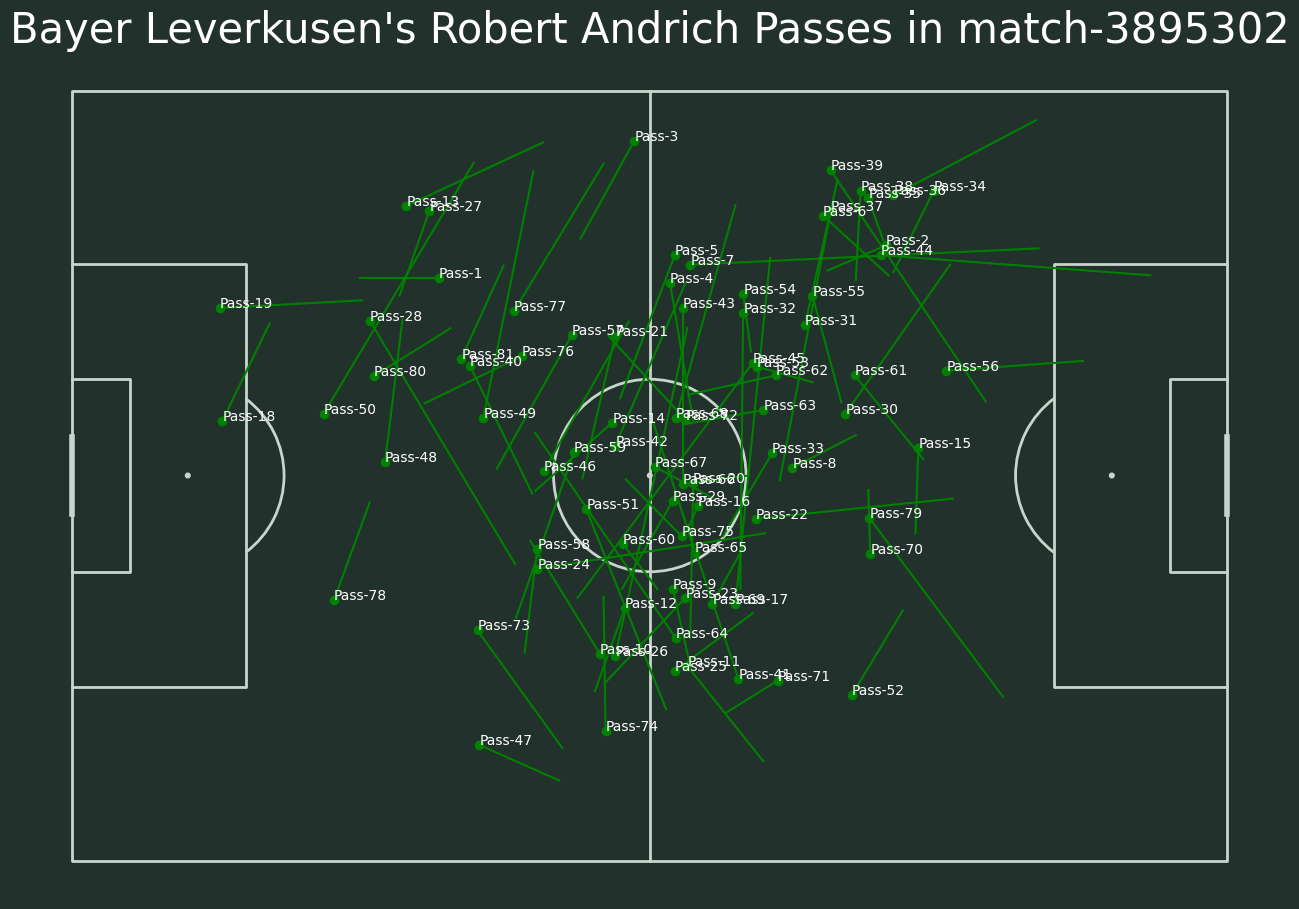

In [12]:


# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

player = input('Enter the name of the player: ')
match_id = int(input('Enter the match id: '))
time_from = int(input('Enter the minute from: '))
time_to = int(input('Enter the minute to: '))



if player=='':
    plt.title(f"Bayer Leverkusen's Passes in match-{match_id}", color='white', size=30)
    
    # Filter the DataFrame based on the user input
    df = BayerL_Pass[(BayerL_Pass['match_id'] == match_id) & 
                     (BayerL_Pass['minute'] >= time_from) & 
                     (BayerL_Pass['minute'] <= time_to)]
    
    for i in range(len(df)):
        plt.plot((df.iloc[i]['x'], df.iloc[i]['endx']), (df.iloc[i]['y'], df.iloc[i]['endy']), color="green")
        plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], color='green')
        plt.text(df.iloc[i]['x'], df.iloc[i]['y'],f'Pass-{i+1}',color='white',fontsize=10)
    
    plt.show()
    print(df)
else:
    plt.title(f"Bayer Leverkusen's {player} Passes in match-{match_id}", color='white', size=30)
    # Filter the DataFrame based on the user input
    df = BayerL_Pass[(BayerL_Pass['player'] == player) &
                    (BayerL_Pass['match_id'] == match_id) & 
                     (BayerL_Pass['minute'] >= time_from) & 
                     (BayerL_Pass['minute'] <= time_to)]
    
    for i in range(len(df)):
        plt.plot((df.iloc[i]['x'], df.iloc[i]['endx']), (df.iloc[i]['y'], df.iloc[i]['endy']), color="green")
        plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], color='green')
        plt.text(df.iloc[i]['x'], df.iloc[i]['y'],f'Pass-{i+1}',color='white',fontsize=10)
    
    plt.show()
    # print(df)    

# https://youtu.be/UbDHze0tkRU?t=70

## Mapping passes with pop up window

Player: Robert Andrich
Match ID: 3895302
Time from: 0
Time to: 92


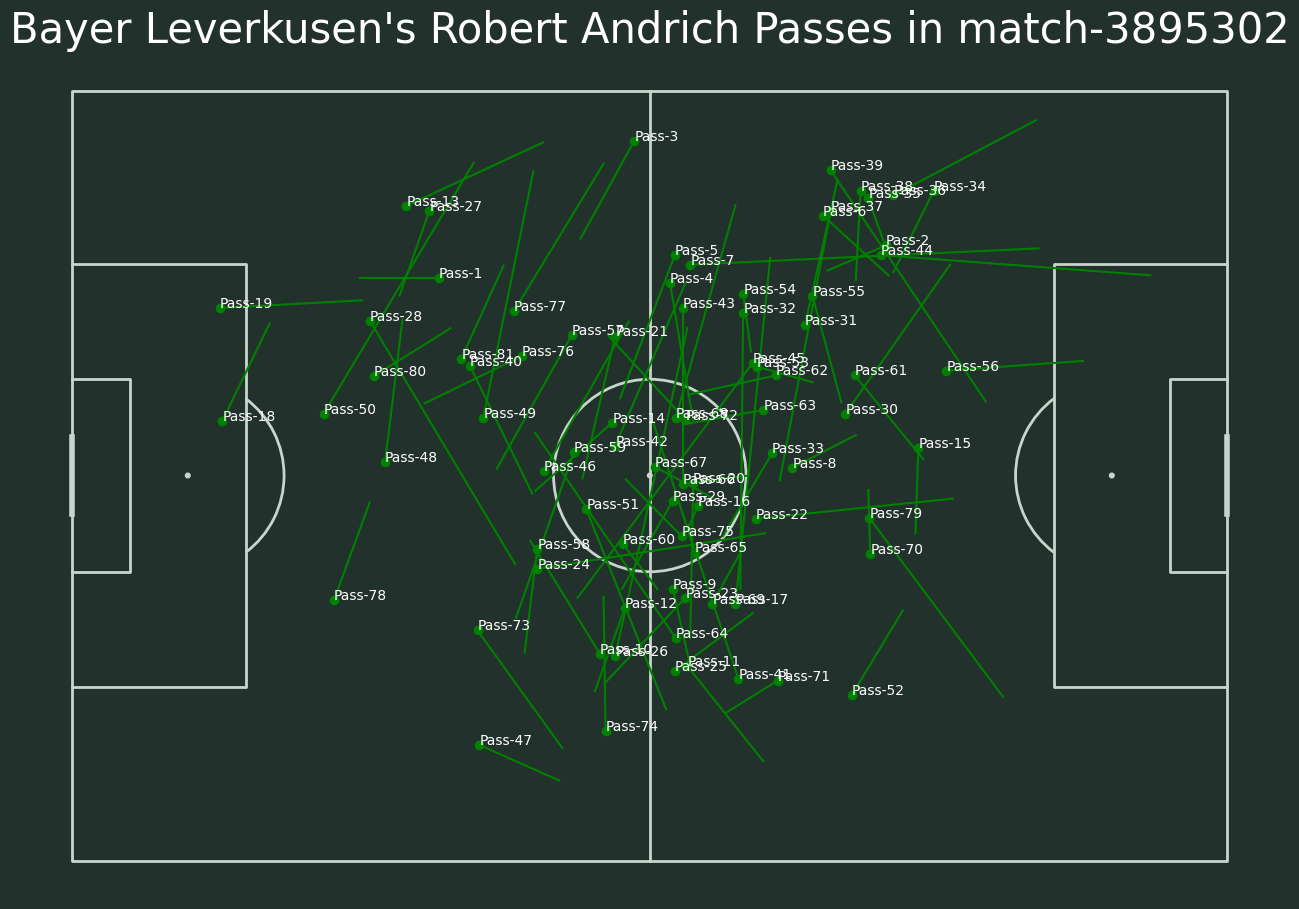

In [13]:
# Get unique players and add 'ALL'
players = list(BayerL_Pass['player'].unique())
players.append('ALL')

match_ids = list(BayerL_Pass['match_id'].unique())
times = list(range(BayerL_Pass['minute'].min(), BayerL_Pass['minute'].max() + 1))

# Initialize the Tkinter root window
root = tk.Tk()
root.title("Player Input")

# Variables to store the selections
selected_player = tk.StringVar(value=players[0])
selected_match_id = tk.StringVar(value=str(match_ids[0]))
selected_time_from = tk.StringVar(value=str(times[0]))
selected_time_to = tk.StringVar(value=str(times[0]))

# Function to submit the selections
def submit():
    global player, match_id, time_from, time_to
    player = selected_player.get()
    match_id = int(selected_match_id.get())
    time_from = int(selected_time_from.get())
    time_to = int(selected_time_to.get())
    root.quit()

# Create and place the dropdowns
ttk.Label(root, text="Select the name of the player:").grid(column=0, row=0, padx=10, pady=5)
ttk.Combobox(root, textvariable=selected_player, values=players).grid(column=1, row=0, padx=10, pady=5)

ttk.Label(root, text="Select the match id:").grid(column=0, row=1, padx=10, pady=5)
ttk.Combobox(root, textvariable=selected_match_id, values=match_ids).grid(column=1, row=1, padx=10, pady=5)

ttk.Label(root, text="Select the minute from:").grid(column=0, row=2, padx=10, pady=5)
ttk.Combobox(root, textvariable=selected_time_from, values=times).grid(column=1, row=2, padx=10, pady=5)

ttk.Label(root, text="Select the minute to:").grid(column=0, row=3, padx=10, pady=5)
ttk.Combobox(root, textvariable=selected_time_to, values=times).grid(column=1, row=3, padx=10, pady=5)

# Submit button
ttk.Button(root, text="Submit", command=submit).grid(column=0, row=4, columnspan=2, pady=10)

# Start the Tkinter main loop
root.mainloop()

# Continue with the rest of the code after the selections
print(f"Player: {player}")
print(f"Match ID: {match_id}")
print(f"Time from: {time_from}")
print(f"Time to: {time_to}")

# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

if player == 'ALL':
    plt.title(f"Bayer Leverkusen's Passes in match-{match_id}", color='white', size=30)

    # Filter the DataFrame based on the user input
    df = BayerL_Pass[(BayerL_Pass['match_id'] == match_id) & 
                     (BayerL_Pass['minute'] >= time_from) & 
                     (BayerL_Pass['minute'] <= time_to)]
    
    for i in range(len(df)):
        plt.plot((df.iloc[i]['x'], df.iloc[i]['endx']), (df.iloc[i]['y'], df.iloc[i]['endy']), color="green")
        plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], color='green')
        plt.text(df.iloc[i]['x'], df.iloc[i]['y'],f'Pass-{i+1}',color='white',fontsize=10)
    
    plt.show()
    # print(df)
else:
    plt.title(f"Bayer Leverkusen's {player} Passes in match-{match_id}", color='white', size=30)
    # Filter the DataFrame based on the user input
    df = BayerL_Pass[(BayerL_Pass['player'] == player) &
                    (BayerL_Pass['match_id'] == match_id) & 
                     (BayerL_Pass['minute'] >= time_from) & 
                     (BayerL_Pass['minute'] <= time_to)]
    
    for i in range(len(df)):
        plt.plot((df.iloc[i]['x'], df.iloc[i]['endx']), (df.iloc[i]['y'], df.iloc[i]['endy']), color="green")
        plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], color='green')
        plt.text(df.iloc[i]['x'], df.iloc[i]['y'],f'Pass-{i+1}',color='white',fontsize=10)
    
    plt.show()
    # print(df)
